In [1]:
from mancha_de_inidacao import *
import rasterio
import rasterio.mask
from rasterio.plot import show
import geopandas
import fiona
import matplotlib.pyplot as plt

In [2]:
fiona.supported_drivers['KML'] = 'rw'

In [3]:
lat=-30.8767 
long=-54.1869
v=2100000
h=9

In [4]:
ponto_informado = Point((long, lat))

In [5]:
crio(v)

12.191161450700001

In [6]:
qmax_barr = qmax_barragem(h, v)

In [7]:
qmax_barr

678.4285170017035

In [8]:
srtm = rasterio.open('s31_w055_3arc_v2.tif')

In [9]:
cotas(ponto_informado, srtm, h)

(235, 244)

In [10]:
tracado = geopandas.read_file('tracado_do_rio.kml', driver='KML')

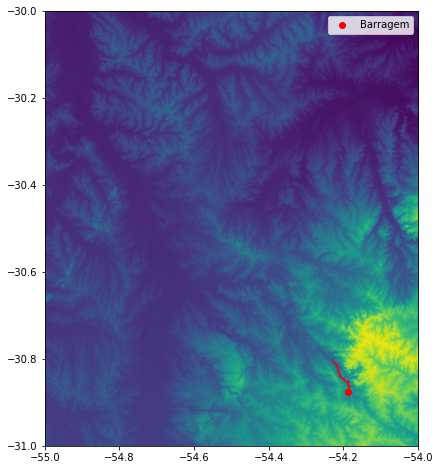

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
show(srtm, ax=ax)

ax.scatter(ponto_informado.x, ponto_informado.y, color='red', label='Barragem')

tracado.plot(ax=ax, color='red')

plt.legend()
plt.show()

In [12]:
tracado_simplificado = simplificar_tracado(tracado, 8)

<AxesSubplot:>

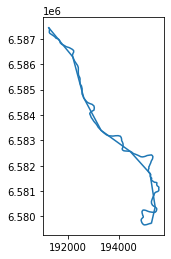

In [13]:
tracado_simplificado.plot()

In [14]:
s, ds = secoes_perpendiculares(tracado_simplificado)

<AxesSubplot:>

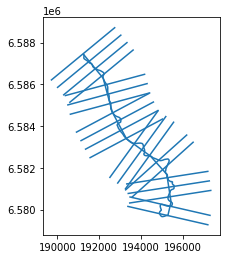

In [15]:
s.plot()

In [16]:
minx, miny, maxx, maxy = min(s.bounds['minx']), min(s.bounds['miny']), max(s.bounds['maxx']), max(s.bounds['maxy'])

In [17]:
c, dp = cotas_secoes(s, srtm)

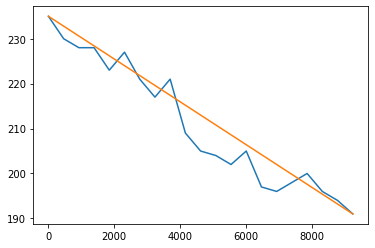

In [18]:
ct = [i[40] for i in c]
plt.plot(ds, ct)
plt.plot([ds[0], ds[-1]], [ct[0], ct[-1]])
j = (ct[0] - ct[-1])/ds[-1]

In [19]:
j

0.004762073746223682

In [20]:
qs = []
for i in ds:
    qs.append(qmax_secao(i, qmax_barr, v))

In [21]:
qs

[678.4285170017035,
 594.4010015599401,
 520.7808071171818,
 456.27892340331795,
 399.7659919430278,
 350.2525322058978,
 306.8716168686171,
 268.8636928517646,
 235.56328236389817,
 206.3873311025581,
 180.8249996017421,
 158.42871898334624,
 138.80635450841885,
 121.6143397204529,
 106.55166096696742,
 93.35458697483023,
 81.79205119986766,
 71.66160610067803,
 62.78587850034316,
 55.00946397324119,
 48.196205881021235]

In [22]:
areas = []
raios = []
for cotas in c: 
    a, r, h = raio_hidraulico(cotas, dp)
    areas.append(a)
    raios.append(r)
alturas = h

In [23]:
qs = []
for idx in range(len(areas[0])):
    q = manning(areas[0][idx], raios[0][idx], j)
    qs.append(q)

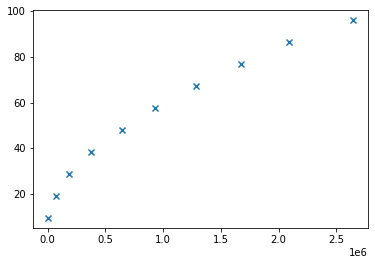

In [24]:
plt.scatter(qs, alturas[1:], marker='x')

In [25]:
a = polyfit(qs, alturas[1:], np.linspace(0,max(qs), 100))

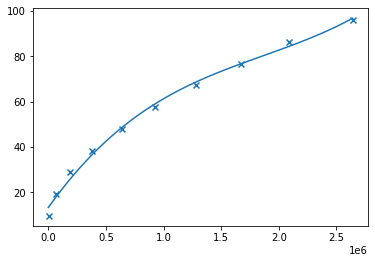

In [26]:
plt.plot(np.linspace(0,max(qs), 100), a)
plt.scatter(qs, alturas[1:], marker='x')

In [27]:
clip_raster(s, srtm)

In [28]:
clipado = rasterio.open('srtm_cropado')

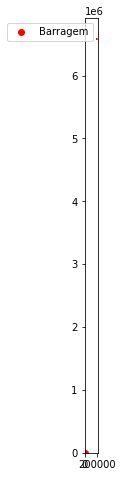

In [31]:
fig, ax = plt.subplots(figsize=(8,8))
show(clipado, ax=ax)

ax.scatter(ponto_informado.x, ponto_informado.y, color='red', label='Barragem')

tracado.plot(ax=ax, color='red')

s.
s.plot(ax=ax, color='red')

plt.legend()
plt.show()